In [1]:
# https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html

import numpy as np
import pylab as plt
from sklearn import neighbors, datasets

Text(0, 0.5, 'Sepal width')

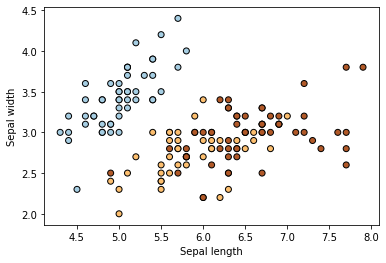

In [9]:
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. 
Y = iris.target

plt.scatter(X[:,0], X[:,1],c=Y, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

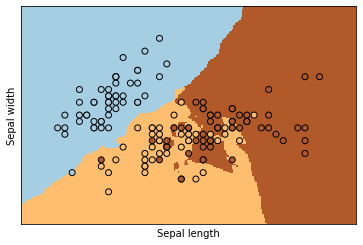

In [8]:
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
h = .02 # step size in the mesh
knn=neighbors.KNeighborsClassifier()
knn.fit(X, Y)
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Plot also the training points
plt.scatter(X[:,0], X[:,1],c=Y, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()